In [1]:
import json
from utils import *
from run import run_, DEFAULT_ARGS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
args = DEFAULT_ARGS
args["max_gen"] = args["max_iterations"]
args["pair_children_size"] = 5
args["population_size"] = 1000
args["mutation_probability"] = 0.7
args["function_name"] = "schwefel"
filename_ = "schwefel"

run_(args, filename=filename_, n_runs=3)
display(args)

'3 solutions of 3 were found in 83.54 seconds'

{'population_size': 1000,
 'max_iterations': 10000,
 'pair_children_size': 5,
 'dimensions': 30,
 'recombination_probability': 0.9,
 'mutation_method': 'gaussian',
 'mutation_probability': 0.7,
 'parent_method': 'tournament',
 'survivor_method': 'best',
 'max_gen': 10000,
 'index_mutation_probability': 0.3,
 'function_name': 'schwefel'}

In [3]:
with open(filename_ + '.json', 'r') as f:
    data_schwefel = json.load(f)

### Média de iterações para o algoritmo convergir

Text(-0.4, 1775, 'Std: 51.49')

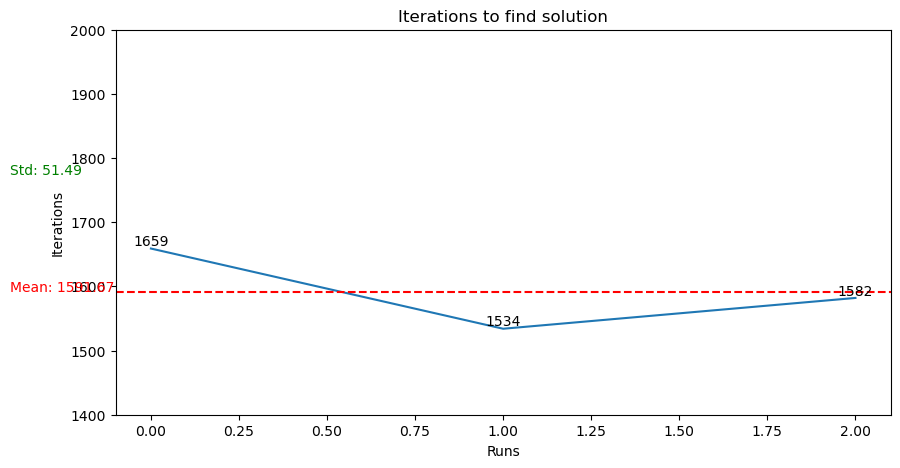

In [4]:
solutions = [i for i in data_schwefel if i["found_solution"]]

iterations_info = [i["iterations"] for i in solutions]

iterations_mean = np.mean(iterations_info)
rounded_mean = round(iterations_mean, 2)

iterations_std = np.std(iterations_info)
rounded_std = round(iterations_std, 2)

plt.figure(figsize=(10, 5))
plt.title("Iterations to find solution")
plt.xlabel("Runs")
plt.ylabel("Iterations")
plt.ylim(1400, 2000)

plt.plot(iterations_info)
for i in range(len(iterations_info)):
    plt.text(i, iterations_info[i], str(iterations_info[i]), ha='center', va='bottom', color='black')
    
# put mean as a red line
plt.axhline(y=iterations_mean, color='r', linestyle='--')
plt.text(-0.4, rounded_mean, "Mean: " + str(rounded_mean), color='r')

# put std as a green line
#plt.axhline(y=rounded_std, color='g', linestyle='--')
plt.text(-0.4, 1775, "Std: " + str(rounded_std), color='g')

### Fitness médio da população (média da média)

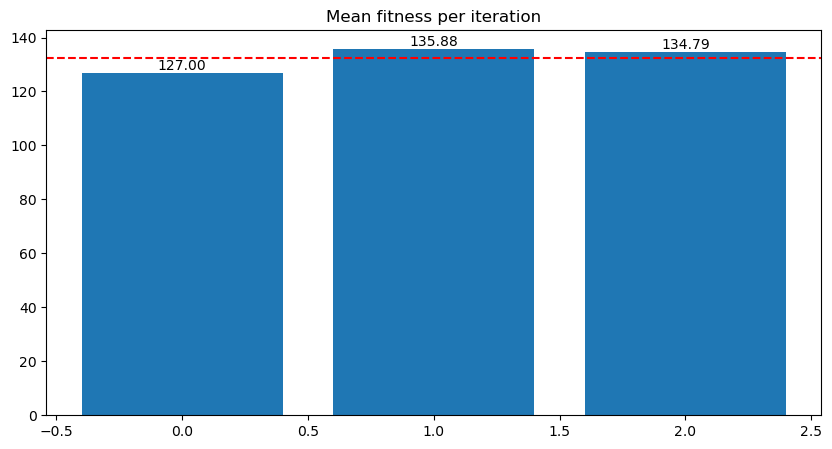

In [5]:
mean_fitness_per_iteration = []
for run in data_schwefel:
    mean_fitness_per_iteration.append(np.mean(run["mean_per_iteration"]))
    
    
plt.figure(figsize=(10, 5))
plt.title("Mean fitness per iteration")
plt.bar(range(len(mean_fitness_per_iteration)), mean_fitness_per_iteration, )

for i in range(len(mean_fitness_per_iteration)):
    plt.text(i, mean_fitness_per_iteration[i], f"{mean_fitness_per_iteration[i]:.2f}", ha="center", va="bottom")

plt.axhline(y=np.mean(mean_fitness_per_iteration), color="red", linestyle="--", label="Mean")

### Fitness médio da ultima geração

In [ ]:
mean_last_pop = []
for run in data_schwefel:
    mean_last_pop.append(np.mean(run["last_population_fitness"]))

mean = np.mean(mean_last_pop)
std = np.std(mean_last_pop)

plt.figure(figsize=(10, 8))
plt.title("Mean last population fitness")
plt.xlabel("Run")
plt.ylabel("Mean fitness")

plt.bar(range(len(mean_last_pop)), mean_last_pop, yerr=std, capsize=5)

    
plt.axhline(y=mean, color='r', linestyle='--')
plt.text(-0.7, mean, "Mean: " + str(round(mean, 2)), ha="center", color='r')

### Gráficos de convergência

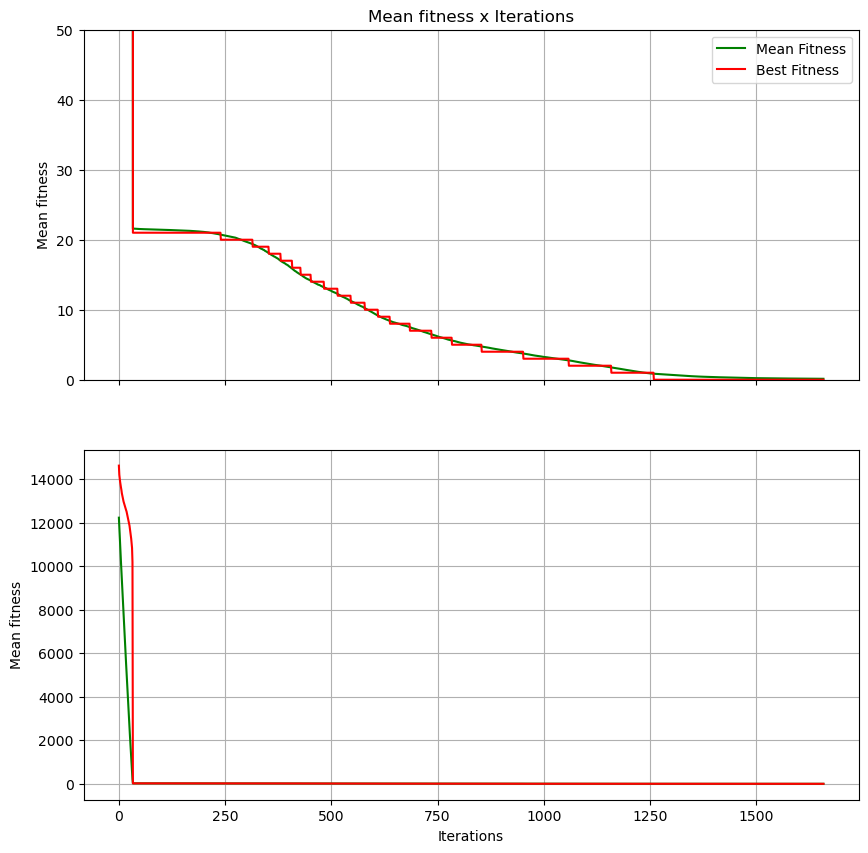

In [6]:
# max

datas_max = []
datas_max.append(max(solutions, key=lambda x: x["iterations"]))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.set_title("Mean fitness x Iterations")
ax1.set_ylabel("Mean fitness")
ax1.grid(True)

ax2.set_ylabel("Mean fitness")
ax2.set_xlabel("Iterations")
ax2.grid(True)

for i in range(len(datas_max)):
    mean_per_iteration = datas_max[i]["mean_per_iteration"]
    best_per_iteration = datas_max[i]["best_per_iteration"]
    
    ax2.plot(mean_per_iteration, color='green', label='Mean Fitness')
    ax2.plot(best_per_iteration, color='red', label='Best Fitness')
    
    ax1.plot(mean_per_iteration, color='green', label='Mean Fitness')
    ax1.plot(best_per_iteration, color='red', label='Best Fitness')
    
    
    # Defina os limites do eixo y na primeira subtrama
    ax1.set_ylim(0, 50)
    
    ax1.legend()  # Adicione uma legenda à primeira subtrama

plt.show()